In [1]:
import os
import gc
from tqdm import tqdm
import illustris_python as il
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# %matplotlib widget
basePath = "./sims.TNG/TNG50-1/output"

Snapshot_Init = 71
Snapshot_End = 99
Lbsg_Indcies_Array = np.array(
    [117251, 300903, 324123, 329508, 382215,
        400973, 419618, 457431, 460722, 490814]
)

h = 0.6774  # km/Mpc

m_dm = 4.5e-5  # E10M_Sum
m_dm_h = m_dm * h

Critial_Density = 1.27e-8  # E10M_Sum/kpc^3
Critial_Density_h = Critial_Density / h**2  # E10M_Sum/(kpc/h)^3


In [2]:
def baryon_mass_in_radius(Center, Radius, Coordinates, Masses):
    dist_to_com = np.sqrt(np.sum((Coordinates - Center)**2, axis=1))
    within_radius_idx = np.where(dist_to_com <= Radius)[0]
    total_mass_within_radius = np.sum(Masses[within_radius_idx])
    return total_mass_within_radius


In [3]:
Current_Snapshot = 99
Subhalo_Index = 329508
partType4_Fields = ['Coordinates', 'Masses']
partType4_dict = il.snapshot.loadSubhalo(
    basePath, Current_Snapshot, Subhalo_Index, 4, partType4_Fields)
subhalo_dict = il.groupcat.loadSingle(
    basePath, Current_Snapshot, -1, Subhalo_Index)


In [7]:
radius_indices = np.logspace(-3, 3, num=100)

mass_in_radius = [baryon_mass_in_radius(
    subhalo_dict['SubhaloPos'], radius, partType4_dict['Coordinates'], partType4_dict['Masses']) for radius in tqdm(radius_indices)]


  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [03:24<00:00,  2.05s/it]


In [6]:
baryon_mass_in_radius(subhalo_dict['SubhaloPos'], 10,
                      partType4_dict['Coordinates'], partType4_dict['Masses'])


18.961523

In [4]:
subhalo_dict['SubhaloMassType']


array([5.2369648e+01, 6.9040765e+02, 0.0000000e+00, 0.0000000e+00,
       3.2725979e+01, 6.1897065e-02], dtype=float32)

Text(0.5, 1.0, 'Stars mass Fraction')

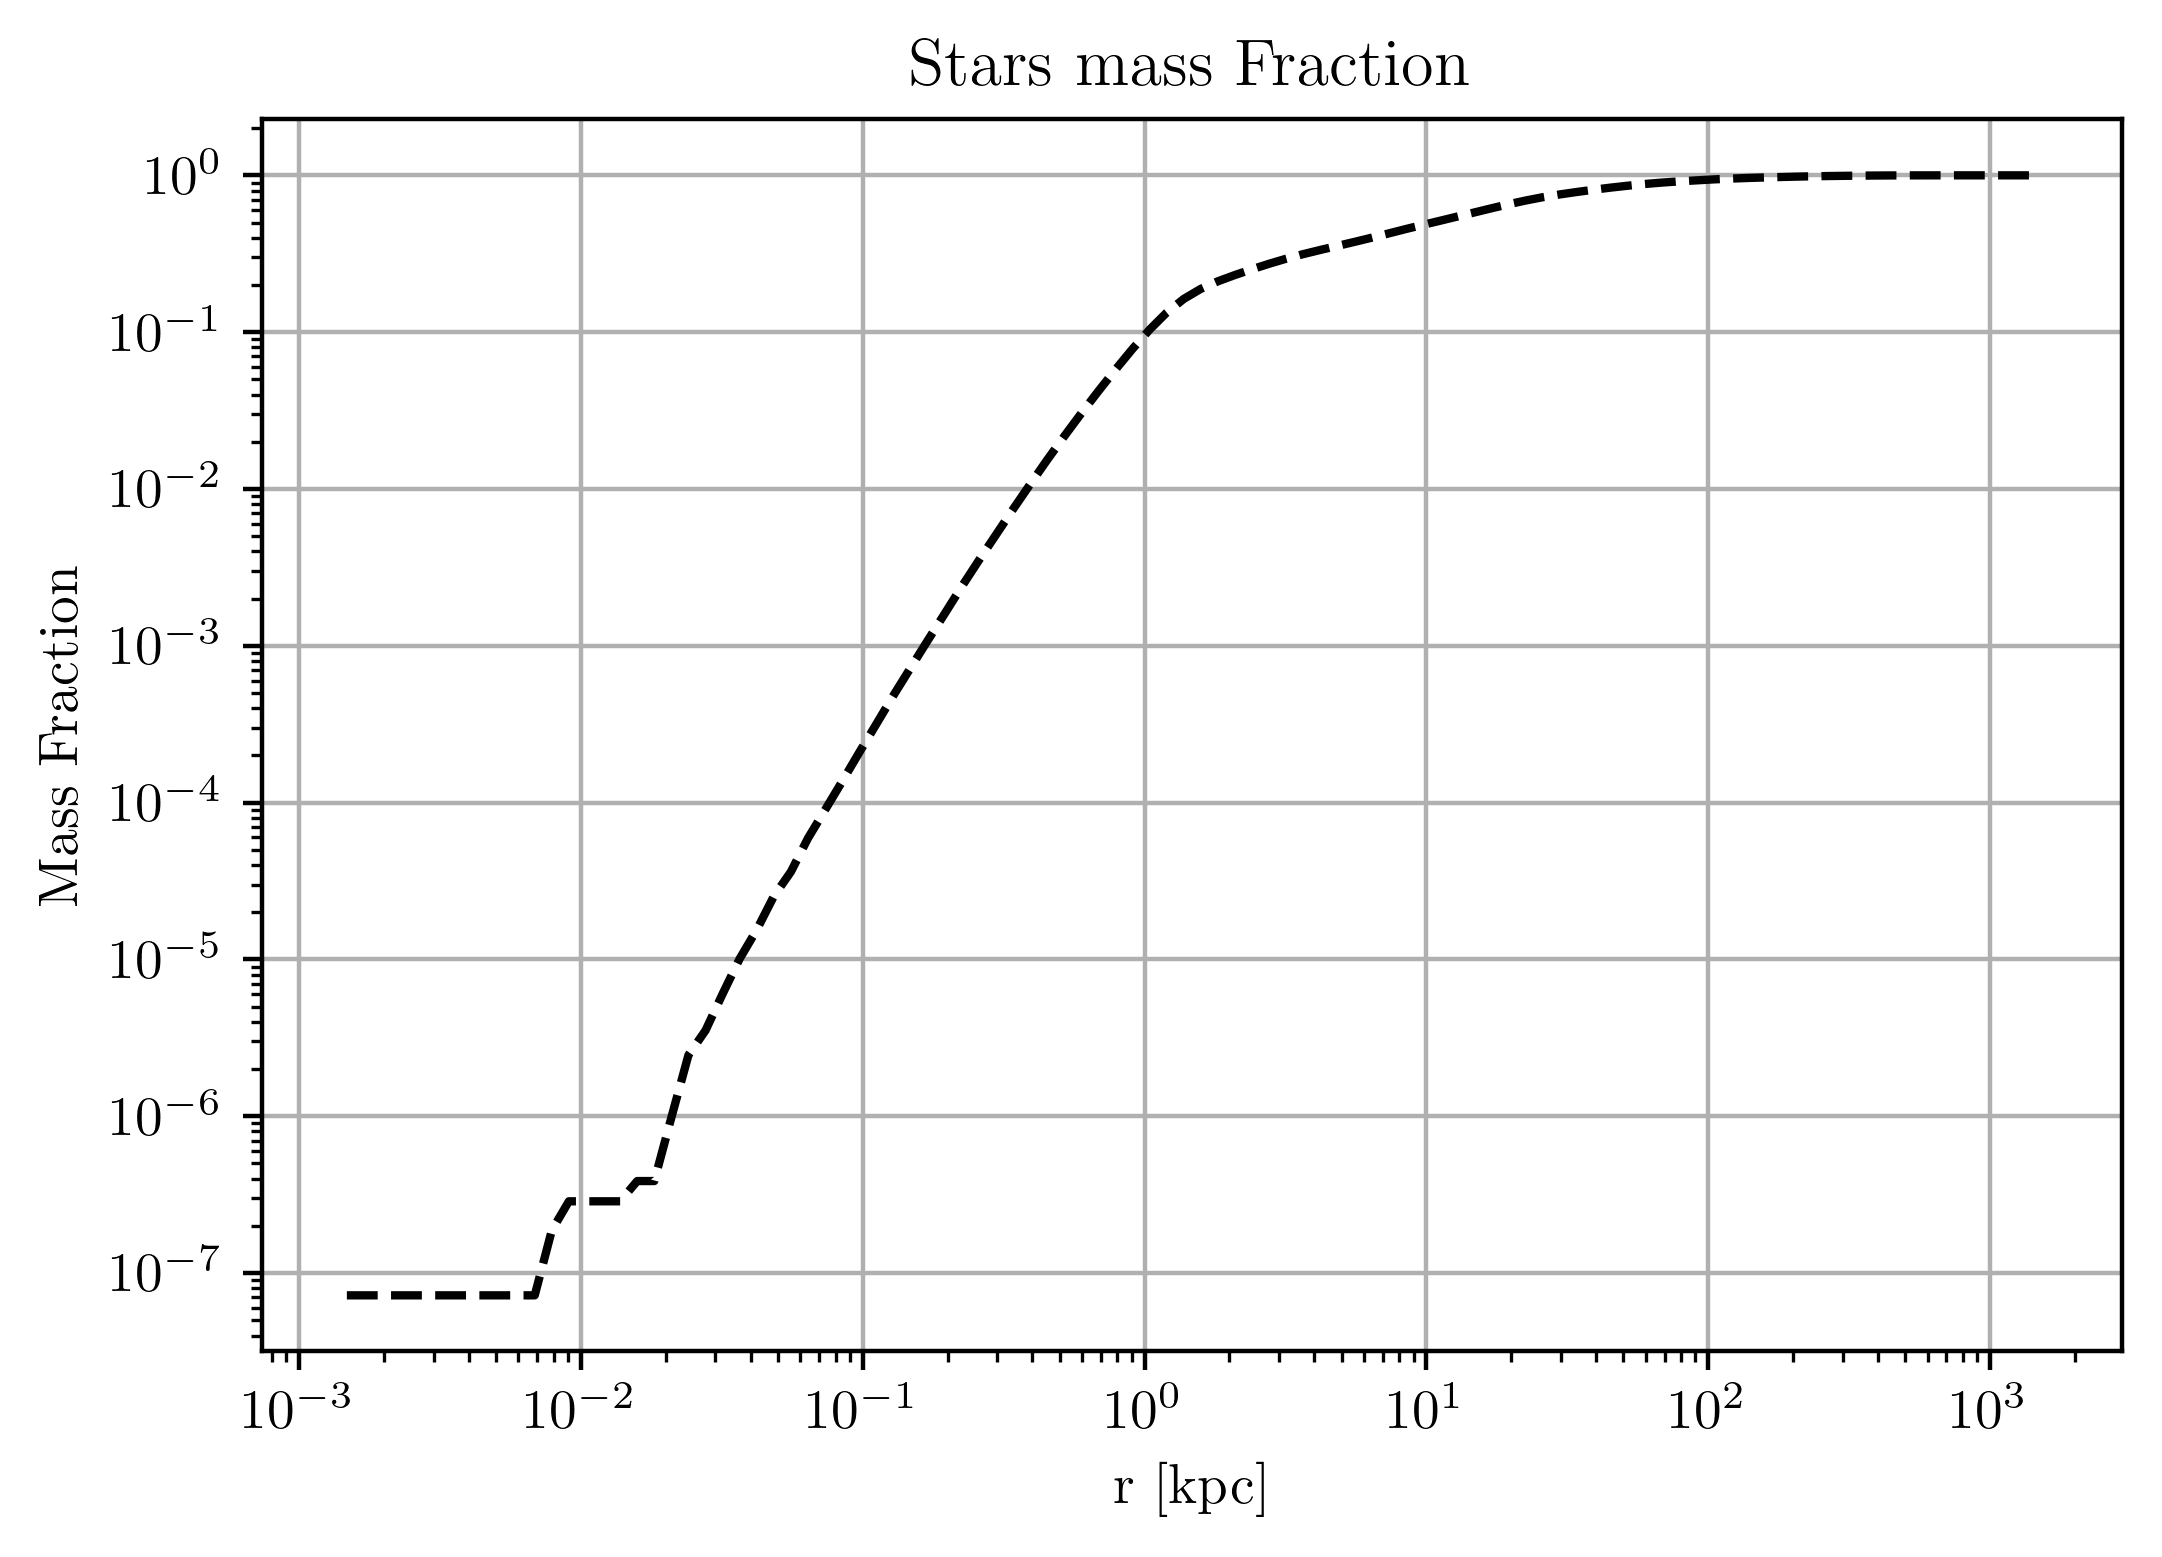

In [20]:
plt.figure(figsize=(6, 4), dpi=400)
plt.plot(radius_indices/0.6774, mass_in_radius/subhalo_dict['SubhaloMassType'][4],'--k')
plt.xlabel(r'r [kpc]', usetex=True)
plt.ylabel('Mass Fraction',usetex=True)
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.xticks(usetex=1)
plt.yticks(usetex=1)
plt.title('Stars mass Fraction',usetex=1)
